# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading data
df= pd.read_csv('/content/drive/MyDrive/Almabetter/Unsupervised learning /Online Retail.csv', encoding= 'unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


**Data Cleanng**

In [ ]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Checking How many Percentage of of null value in customer
print(f'{round(df.CustomerID.isnull().sum()/df.shape[0] * 100,2)} %')

24.93 %


In [ ]:
# Dropping Duplicate Row
df = df.drop_duplicates()

In [ ]:
df.shape

(536641, 8)

In [ ]:
# Dropping values which has Unitprice less than or equal to 0
df=df[df.UnitPrice>0]

In [ ]:
# Dropping values which has Quantity less than or equal to 0
df=df[df.Quantity>0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,392692.000000
mean,10.616600,3.922573,15287.843865
std,156.280031,36.093028,1713.539549
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
# Dropping Null Values from Customer ID column
df2=df[df.CustomerID.notna()]

In [ ]:
df2.shape

(392692, 8)

In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom


Checking weather there is any cancellation

In [ ]:
# Dropping Cancled Invoice Numbers
df2["cancellations"] = np.where(df2["InvoiceNo"].str.startswith('C'), 1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.cancellations.value_counts()

0    392692
Name: cancellations, dtype: int64

Changing Invoice date column data type


In [ ]:
# Changing Data type of InvoiceDate
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      392692 non-null  object        
 1   StockCode      392692 non-null  object        
 2   Description    392692 non-null  object        
 3   Quantity       392692 non-null  int64         
 4   InvoiceDate    392692 non-null  datetime64[ns]
 5   UnitPrice      392692 non-null  float64       
 6   CustomerID     392692 non-null  float64       
 7   Country        392692 non-null  object        
 8   cancellations  392692 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [ ]:
df2.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
cancellations    0
dtype: int64

In [ ]:
df2.shape

(392692, 9)

**EDA**

Checking Total Sale with respect to country


In [ ]:
# Creating new column called total sale 
df2["Total_sales"] = df2["UnitPrice"]*df2["Quantity"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Grouping total_sale by country and finding total revenue in %
country_df = df2.groupby("Country")["Total_sales"].sum().reset_index()
country_df["Total_sales%"] = round(country_df["Total_sales"]*100/country_df["Total_sales"].sum(),2)


In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellations,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,15.3


In [ ]:
country_df.head(1)

,Country,Total_sales,Total_sales%
0,Australia,138453.81,1.56


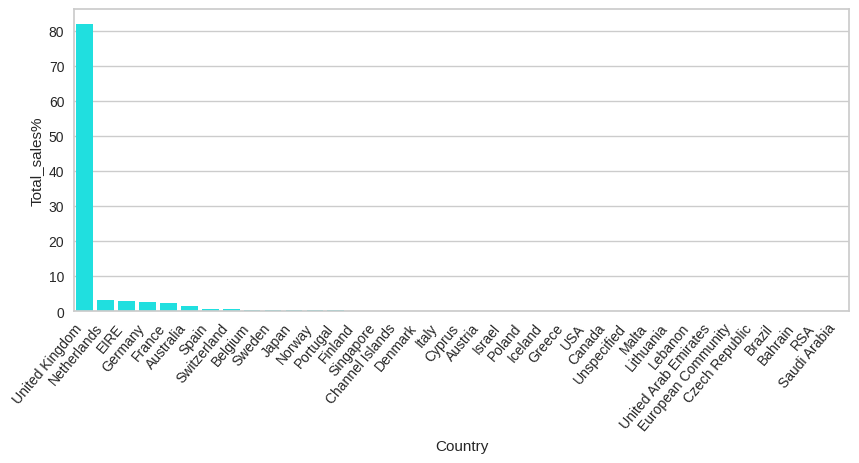

In [ ]:
# ploting country wise distribution
country_df = country_df.sort_values(by = "Total_sales%", ascending = False)
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax=sns.barplot(x=country_df["Country"], y=country_df['Total_sales%'],color='cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show() 

As UK having most sale Lets check the  top 5 items that sold


In [ ]:
# Top 5 items sold in UK
uk_product = df2.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', \
                                                                                                      ascending=False)
uk_product.head()

,StockCode,Description,Quantity
2602,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2100,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
3020,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3444,85099B,JUMBO BAG RED RETROSPOT,46078
3459,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706


# Recency


setting reference date

In [ ]:
import datetime

reference_date=df2.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(days=1)
print('The reference date is', reference_date)

The reference date is 2011-12-11 17:19:00


In [ ]:
df2['days_since_last_purchase']=reference_date-df2.InvoiceDate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#changing Data type of Days_since_last_purchace column to float
df2['days_since_last_purchase_float']=df2['days_since_last_purchase'].astype('timedelta64[D]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   InvoiceNo                       392692 non-null  object         
 1   StockCode                       392692 non-null  object         
 2   Description                     392692 non-null  object         
 3   Quantity                        392692 non-null  int64          
 4   InvoiceDate                     392692 non-null  datetime64[ns] 
 5   UnitPrice                       392692 non-null  float64        
 6   CustomerID                      392692 non-null  float64        
 7   Country                         392692 non-null  object         
 8   cancellations                   392692 non-null  int64          
 9   Total_sales                     392692 non-null  float64        
 10  days_since_last_purchase        392692 non-n

In [ ]:
# Creating Recency DF
recency_df=df2.groupby('CustomerID').min().reset_index()[['CustomerID','days_since_last_purchase_float']]
recency_df.rename(columns={'days_since_last_purchase_float':'Recency'}, inplace=True)

In [ ]:
recency_df.head(2)

,CustomerID,Recency
0,12346.0,327.0
1,12347.0,41.0


In [ ]:
recency_df.shape

(4338, 2)

In [ ]:
recency_df.describe()

,CustomerID,Recency
count,4338.000000,4338.000000
mean,15300.408022,106.470954
std,1721.808492,115.082161
min,12346.000000,1.000000
25%,13813.250000,23.000000
50%,15299.500000,62.000000
75%,16778.750000,162.750000
max,18287.000000,698.000000


In [ ]:
# Create a list in a range of 10-20
My_list = [*range(0,801, 20)]
  
# Print the list
print(My_list)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800]


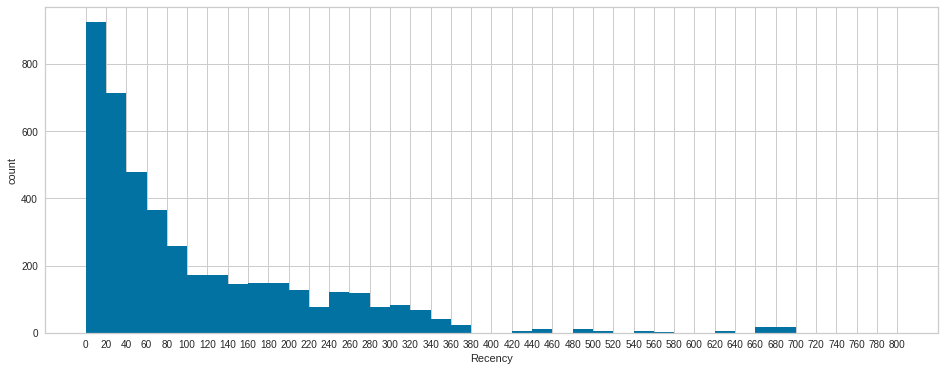

In [ ]:
# Ploting 
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(recency_df.Recency, bins=My_list)
plt.xticks(bins)
plt.xlabel('Recency')
plt.ylabel("count")
plt.show()

#**Frequency**

In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellations,Total_sales,days_since_last_purchase,days_since_last_purchase_float
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0,15.3,698 days 08:53:00,698.0


In [ ]:
print(len(df.InvoiceNo.unique()))
print(len(df.CustomerID.unique()))

19960
4339


In [ ]:
# creating Freq_df
freq_df=df2[['CustomerID','InvoiceNo']].groupby('CustomerID').count().reset_index()
freq_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [ ]:
freq_df.head(2)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182


In [ ]:
freq_df.describe()

,CustomerID,Frequency
count,4338.000000,4338.000000
mean,15300.408022,90.523744
std,1721.808492,225.506968
min,12346.000000,1.000000
25%,13813.250000,17.000000
50%,15299.500000,41.000000
75%,16778.750000,98.000000
max,18287.000000,7676.000000


In [ ]:
freq_df.Frequency.quantile(0.9) 

202.30000000000018

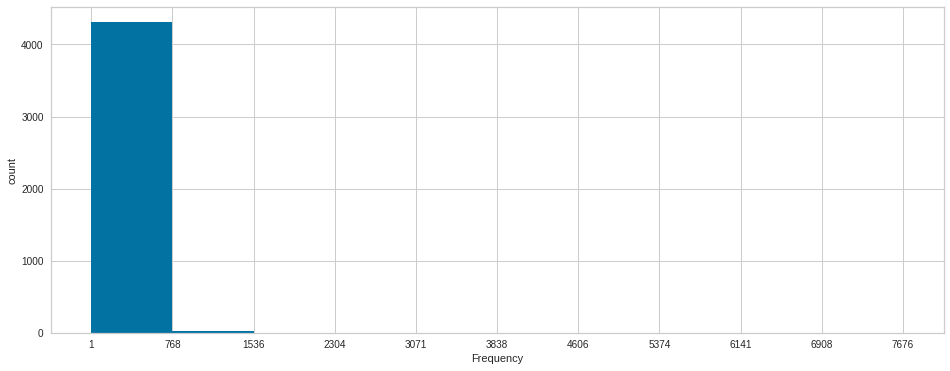

In [ ]:
# Ploting Frequency
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(freq_df.Frequency, bins=10)
plt.xticks(bins)
plt.xlabel('Frequency')
plt.ylabel("count")
plt.show()

#**Monetory** 

In [ ]:
#calculating Monetary
monetary_df=df2[['CustomerID','Total_sales']].groupby('CustomerID').sum().reset_index()
monetary_df.rename(columns={'Total_sales': 'Monetary'},inplace=True)
monetary_df.head(2)

,CustomerID,Monetary
0,12346.0,77183.6
1,12347.0,4310.0


In [ ]:
monetary_df.describe()

,CustomerID,Monetary
count,4338.000000,4338.000000
mean,15300.408022,2048.688081
std,1721.808492,8985.230220
min,12346.000000,3.750000
25%,13813.250000,306.482500
50%,15299.500000,668.570000
75%,16778.750000,1660.597500
max,18287.000000,280206.020000


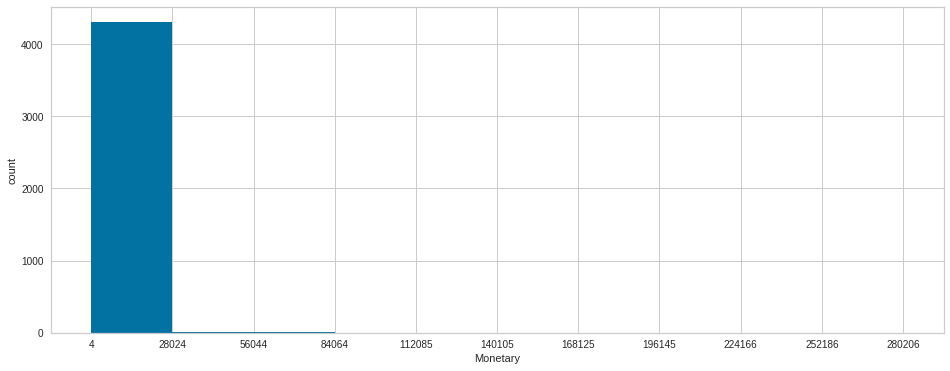

In [ ]:
# Ploting Monetary
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(monetary_df.Monetary, bins=10)
plt.xticks(bins)
plt.xlabel('Monetary')
plt.ylabel("count")
plt.show()

**Combining all Three Recency, Frequency, Monetary Df** 

In [ ]:
#Combining all three columns
rfm_df=recency_df.merge(freq_df,how='outer')
rfm_df=rfm_df.merge(monetary_df,how='outer')

In [ ]:
rfm_df.shape

(4338, 4)

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,327.0,1,77183.60
1,12347.0,41.0,182,4310.00
2,12348.0,77.0,31,1797.24
3,12349.0,20.0,73,1757.55
4,12350.0,312.0,17,334.40


**Scaling Data**

In [ ]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

feature_vector=['Recency_log','Frequency_log','Monetary_log']

X=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
rfm_df_scaled=pd.DataFrame(scaler.fit_transform(X))

In [ ]:
rfm_df_scaled.head()

,0,1,2
0,1.345224,-2.779978,3.700201
1,-0.213667,1.160356,1.413256
2,0.259494,-0.179855,0.719951
3,-0.752600,0.468643,0.702251
4,1.309970,-0.634745,-0.612996


In [ ]:
rfm_df_scaled.describe()

,0,1,2
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.145715e-16,2.129335e-16,5.241440e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-3.001707e+00,-2.779978e+00,-4.172381e+00
25%,-6.476706e-01,-6.347448e-01,-6.820955e-01
50%,9.682346e-02,3.183903e-02,-6.385708e-02
75%,8.213750e-01,6.916361e-01,6.572740e-01
max,1.914502e+00,3.993582e+00,4.722173e+00


In [ ]:
# Changing Column name of Scaled Data
rfm_df_scaled.rename(columns={0:'Recency',1:'Frequency',2:'Monetary'},inplace=True)
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,1.345224,-2.779978,3.700201
1,-0.213667,1.160356,1.413256
2,0.259494,-0.179855,0.719951
3,-0.752600,0.468643,0.702251
4,1.309970,-0.634745,-0.612996


In [ ]:
rfm_df_customer_id=pd.DataFrame(rfm_df['CustomerID'])
rfm_df_customer_id.head()

,CustomerID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0


In [ ]:
# Joining Customer ID t Scaled Data
rfm_df_scaled_2=pd.concat([rfm_df_customer_id,rfm_df_scaled],axis=1)

In [ ]:
rfm_df_scaled_2.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,1.345224,-2.779978,3.700201
1,12347.0,-0.213667,1.160356,1.413256
2,12348.0,0.259494,-0.179855,0.719951
3,12349.0,-0.752600,0.468643,0.702251
4,12350.0,1.309970,-0.634745,-0.612996


#**Scatter Plot of All Combinations**

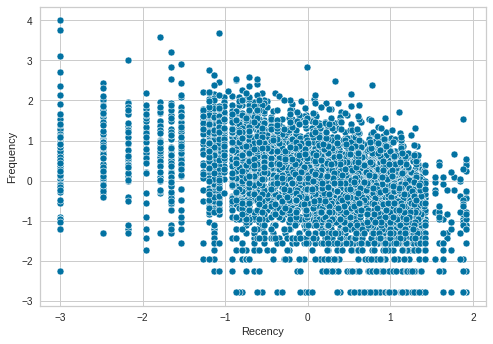

In [ ]:
# Scatterplot of Recency vs Frequency
sns.scatterplot(data=rfm_df_scaled_2, x="Recency", y="Frequency")

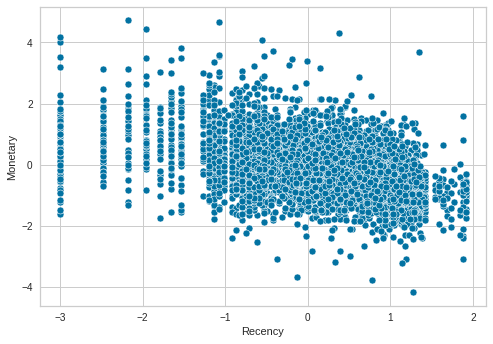

In [ ]:
# Scatter Plot of Recency vs Monetary
sns.scatterplot(data=rfm_df_scaled_2, x="Recency", y="Monetary")

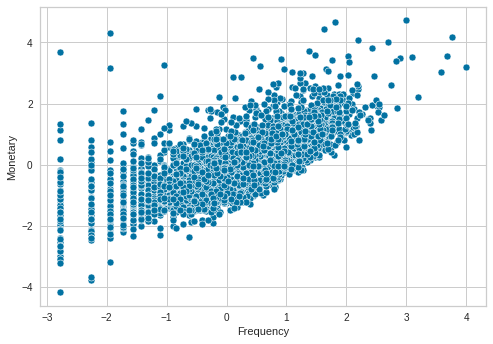

In [ ]:
# Scatter Plot of Frequency vs Monetary
sns.scatterplot(data=rfm_df_scaled_2, x="Frequency", y="Monetary")

**3D plot for RFM**

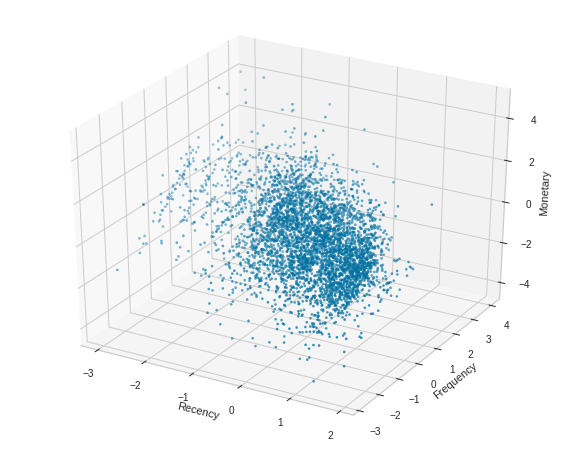

In [ ]:
# 3D plotting for all three variables
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df_scaled_2.Recency
ys=rfm_df_scaled_2.Frequency
zs=rfm_df_scaled_2.Monetary
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

# **Applying  K-Means Clustering Model**


In [ ]:
RFM_df= rfm_df_scaled_2.drop(['CustomerID'],axis=1)
RFM_df.head(1)

,Recency,Frequency,Monetary
0,1.345224,-2.779978,3.700201


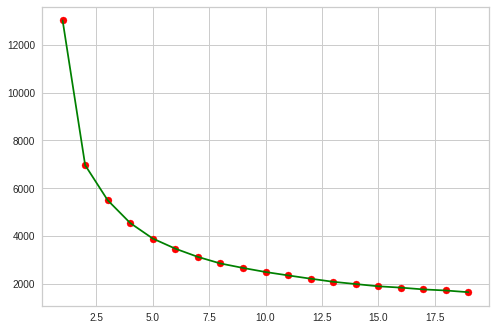

In [ ]:
# Cheking K value using Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
cluster=[]
for k in range(1,20):
  km=KMeans(n_clusters=k)
  km.fit(RFM_df)
  cluster.append(km.inertia_)
plt.plot(np.arange(1,20), cluster,color="green")
plt.scatter(np.arange(1,20), cluster,color="red")
plt.show()



From this we can say K value of 5 is good

# **Plotting Recency Vs Frequency Silhouette Chart and Clustured Scatter plot**


In [ ]:
# Recency Anf Frequency DF
RF_df=RFM_df.drop(['Monetary'],axis=1)


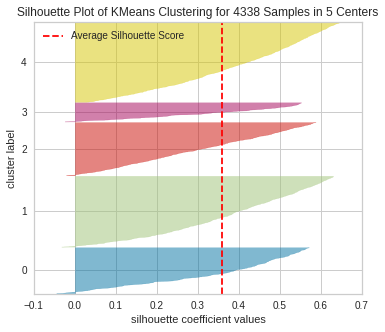

 average silhouette score For RF is 0.36


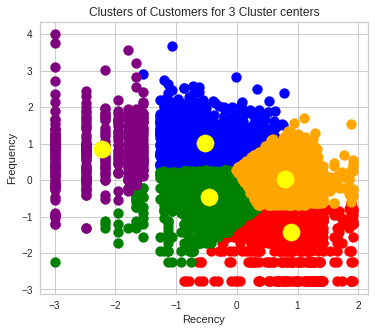

In [ ]:
# plotting silhouette plot and scatter plot for each number of clusters 
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
silhouette_visualizer(KMeans(5, random_state=0), RF_df, colors='yellowbrick')


kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(RF_df)

silhouette_avg = silhouette_score(RF_df, y_kmeans)
print(f' average silhouette score For RF is {round(silhouette_avg,2)}')

RF_df2=RF_df.values
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 2)

plt.scatter(RF_df2[y_kmeans==0][:,0], RF_df2[y_kmeans==0][:,1], s=100, c='red', label ='Cluster 1')
plt.scatter(RF_df2[y_kmeans==1, 0], RF_df2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(RF_df2[y_kmeans==2, 0], RF_df2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(RF_df2[y_kmeans==3, 0], RF_df2[y_kmeans==3, 1], s=100, c='purple', label ='Cluster 2')
plt.scatter(RF_df2[y_kmeans==4, 0], RF_df2[y_kmeans==4, 1], s=100, c='orange', label ='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers for 3 Cluster centers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()





# **Plotting  Frequency vs Monetary Silhouette Chart and Clustured Scatter plot**

In [ ]:
# Frequency and Monetary DF
FM_df=RFM_df.drop(['Recency'],axis=1)

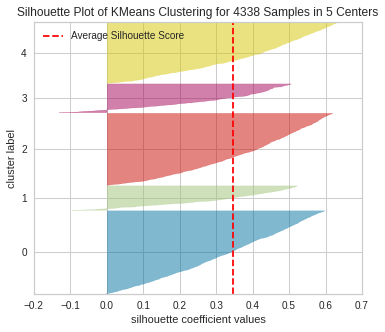

 average silhouette score For FM is 0.35


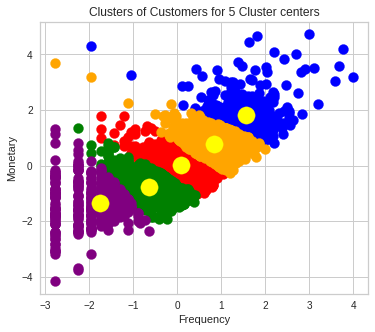

In [ ]:
# plotting silhouette plot and scatter plot for each number of clusters 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit



plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
silhouette_visualizer(KMeans(5, random_state=0), FM_df, colors='yellowbrick')


kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(FM_df)

silhouette_avg = silhouette_score(FM_df, y_kmeans)
print(f' average silhouette score For FM is {round(silhouette_avg,2)}')

FM_df2=FM_df.values
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 2)

plt.scatter(FM_df2[y_kmeans==0][:,0], FM_df2[y_kmeans==0][:,1], s=100, c='red', label ='Cluster 1')
plt.scatter(FM_df2[y_kmeans==1, 0], FM_df2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(FM_df2[y_kmeans==2, 0], FM_df2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(FM_df2[y_kmeans==3, 0], FM_df2[y_kmeans==3, 1], s=100, c='purple', label ='Cluster 3')
plt.scatter(FM_df2[y_kmeans==4, 0], FM_df2[y_kmeans==4, 1], s=100, c='orange', label ='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers for 5 Cluster centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()


# **Plotting Monetary vs recency Silhouette Chart and Clustured Scatter plot**

In [ ]:
# Monetary and Recency DF
MR_df=RFM_df.drop(['Frequency'],axis=1)

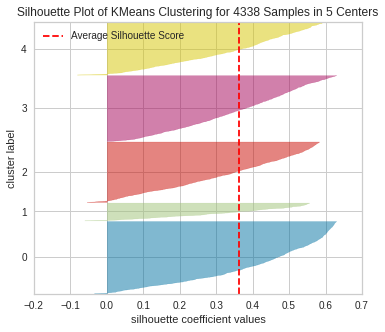

 average silhouette score For MR is 0.36


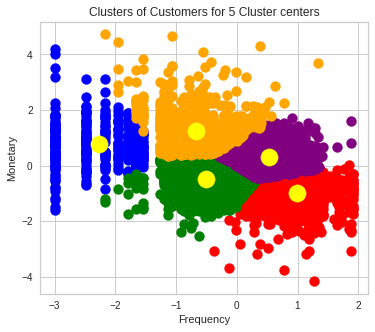

In [ ]:
# plotting silhouette plot and scatter plot for each number of clusters 
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
silhouette_visualizer(KMeans(5, random_state=0), MR_df, colors='yellowbrick')


kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(MR_df)

silhouette_avg = silhouette_score(MR_df, y_kmeans)
print(f' average silhouette score For MR is {round(silhouette_avg,2)}')

MR_df2=MR_df.values
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 2)

plt.scatter(MR_df2[y_kmeans==0][:,0], MR_df2[y_kmeans==0][:,1], s=100, c='red', label ='Cluster 1')
plt.scatter(MR_df2[y_kmeans==1, 0], MR_df2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(MR_df2[y_kmeans==2, 0], MR_df2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(MR_df2[y_kmeans==3, 0], MR_df2[y_kmeans==3, 1], s=100, c='purple', label ='Cluster 2')
plt.scatter(MR_df2[y_kmeans==4, 0], MR_df2[y_kmeans==4, 1], s=100, c='orange', label ='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers for 5 Cluster centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()


# **Pie Chart to see Type of Customers**

In [ ]:
# Creating column name Cluster ID
model = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
ClusterID = model.fit_predict(rfm_df)
ClusterID

rfm_clusters=rfm_df.copy()
rfm_clusters["ClusterID"] = ClusterID
rfm_clusters.drop(['Recency','Frequency','Monetary'],axis=1,inplace=True)

rfm_clusters.head()

,CustomerID,Recency_log,Frequency_log,Monetary_log,ClusterID
0,12346.0,5.789960,0.000000,11.253942,2
1,12347.0,3.713572,5.204007,8.368693,0
2,12348.0,4.343805,3.433987,7.494007,0
3,12349.0,2.995732,4.290459,7.471676,0
4,12350.0,5.743003,2.833213,5.812338,0


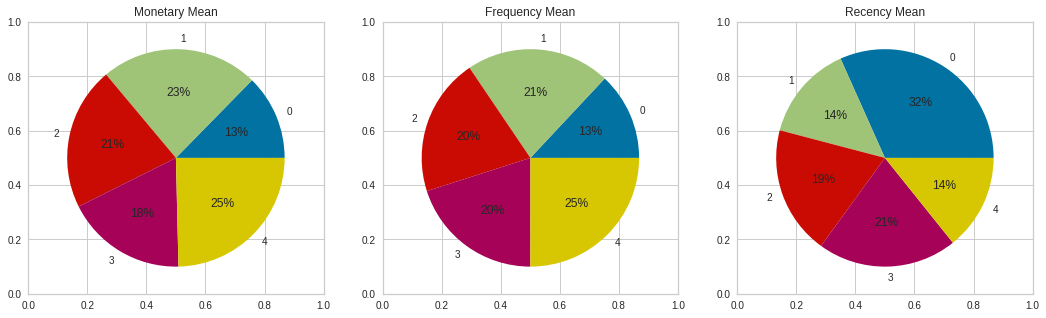

In [ ]:
#Now we are plotting pie-chart
fig,axis = plt.subplots(1,3, figsize =(18,5))


ax1 =fig.add_subplot(1,3,1)


plt.title("Monetary Mean")

km_cluster_sale =rfm_clusters.groupby("ClusterID").Monetary_log.mean()
km_cluster_sale
km_cluster_Recency =rfm_clusters.groupby("ClusterID").Recency_log.mean()
km_cluster_Frequence =rfm_clusters.groupby("ClusterID").Frequency_log.mean()

ax1.pie(km_cluster_sale, labels =[0,1,2,3,4],autopct='%.0f%%')

ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels =[0,1,2,3,4],autopct='%.0f%%')


ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3,4],autopct='%.0f%%')




# ax1.axis("off")


plt.show()

#**Conclusion**

1.	Most purchases are from UK around 80%
2.	Top 5 Items sold in UK Are Paper Craft , Little Birdie - Quantity 80995, Medium Ceramic Top Storage Jar – Quantity 77916, 
World War 2 Gliders Asstd Designs- Quantity 54319, Jumbo Bag Red Retrospot – Quantity 46078, White Hanging Heart T-Light Holder- Quantity 36706
3.	Mean of Recency = 106.470954
4.	Mean of Frequency = 90.523744
5.	Mean of Monetary = 2048.688081
6.	Best number of cluster is 5 found using Elbow Method
7.	Average sihouette score for Recency and Frequency =0.36
8.	Average sihouette score for Frequency and Monetary=0.35
9.	Average sihouette score for Monetary and Recency =0.36
10.	Group 0 has high Recency but Low Frequency and Low Monetary means they come recently but they are not frequent or they do not spend more.
11.	Group 4 has high Monetary and high Frequency customers spend the most and they are also requent





